In [324]:
import tabula
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt

files = {
    2014: {
        "1-sem": {
            "theory": "Taxasdeaprovacao_1_Semestre_2014_Teoricas_Integradas.pdf",
            "driving": "Taxasdeaprovacao_1_Semestre_2014_Praticas_Integradas.pdf"
        },
        "2-sem": {
            "theory": "Taxasdeaprovacao_2_Semestre_2014_Teoricas_Integradas.pdf",
            "driving": "Taxasdeaprovacao_2_Semestre_2014_Praticas_Integradas.pdf"
        }
    },    
    2015: "TaxasApr_2015_Relatorio_Escolas_de_Condução.pdf",
    2016: "TaxasApr_2016_Relatorio_EscolasDeConducao.pdf",
    2017: "TaxasApr_2017_Relatorio_EscolasDeConducao.pdf",
    2018: "TaxasApr_2018_Relatorio_EscolasDeConducao.pdf",
    2019: {"1-sem": "TaxasAp_PP_1sem2019.pdf"}
}

def parse_rate (x):
    
    if x == '#DIV/0!':
        return 0
    elif pd.isna(x):
        return x
    else:
        return float((x.replace(',', '.').replace('%', 'e-2')))
    
def name_to_keyword(x):
    s = unidecode(x) \
    .lower() \
    .replace('>', '') \
    .replace('<', '') \
    .replace('(', '') \
    .replace(')', '') \
    .replace(' ', '_') \
    .replace('escola_de_conducao_', '') \
    .replace('escola_do_', '') \
    .replace('/', '_') \
    .replace('-', '_') \
    .replace('___', '_') \
    .replace('__', '_') 

    return s
    
def prepare_table_b_2018(year):
    
    headers = ['n_ec', 'name_raw', 'theory_scheduled', 'theory_done', 'theory_rate', 'driving_scheduled', 'driving_done', 'driving_rate']
    
    path = files[year]

    all_tables = tabula.read_pdf(path, guess = False, relative_area=True, area=[15, 5, 92, 75], columns=[60, 70, 255, 340, 400, 450, 500, 560], pages='all', stream=True, pandas_options={'header': None})
    table = pd.concat(all_tables, ignore_index=True, sort=False)
    table = table.drop([0], axis=1)

    #table = table.drop([8, 9, 10], axis = 1)
    table.columns = headers
        
    table['theory_rate'] = table['theory_rate'].apply(parse_rate)
    table['driving_rate'] = table['driving_rate'].apply(parse_rate)
    
    summary = table.tail(1) #quality control
    table=table.iloc[:-1,:]
    
    table['k'] = table['name_raw'].apply(name_to_keyword)
    table = table.set_index('k')
    
    return table, summary

t, s = prepare_table_b(2018)
t

,n_ec,name_raw,theory_scheduled,theory_done,theory_rate,driving_scheduled,driving_done,driving_rate
k,,,,,,,,
automovel_club_de_portugal,1.0,Escola De Condução Automovel Club De Portugal,357,336,0.8006,404,399,0.6942
acp,2.0,Escola De Condução Acp,207,206,0.7767,272,271,0.7159
a_popular,5.0,Escola De Condução «A Popular»,57,57,0.7895,54,54,0.6852
automoveis_monumental,6.0,Escola De Condução Automoveis Monumental,323,318,0.7987,354,353,0.6544
a_desportiva_boavista,7.0,Escola De Condução A Desportiva (Boavista),114,104,0.7788,98,95,0.6526
...,...,...,...,...,...,...,...,...
nova_fafe,416.0,Escola De Condução Nova Fafe,33,33,0.8182,31,27,0.8889
royal,417.0,Escola De Condução Royal,46,44,0.7500,35,35,0.6571
casquilhos,419.0,Escola De Condução Casquilhos,21,21,0.6667,12,12,0.6667


,0,1,2
0,NaN,1,Escola De Condução Automovel Club De Portugal ...
1,NaN,2,"Escola De Condução Acp 207 206 77,67% 272 271 ..."
2,NaN,5,"Escola De Condução «A Popular» 57 57 78,95% 54..."
3,NaN,6,Escola De Condução Automoveis Monumental 323 3...
4,NaN,7,Escola De Condução A Desportiva (Boavista) 114...
5,NaN,8,"Escola De Condução Vitória 315 299 49,50% 208 ..."
6,NaN,9,"Escola De Condução Enal 6 6 50,00% 7 7 57,14% ..."
7,NaN,10,Escola De Condução Lusitânia De Automobilsmo 1...
8,NaN,11,"Escola De Condução Rodaqui 231 227 58,15% 185 ..."
9,NaN,12,"Escola De Condução Bastos 129 127 79,53% 136 1..."


In [101]:
#table, summary = prepare_table_b(2017)
#table.plot.scatter(x="theory_rate", y="driving_rate", alpha=0.5)

In [104]:
# works only if k is not index
#table2017.loc[table2017['k'].str.contains('armando_vitor'),:]
#table2017.loc[table2017['k'].str.contains('carcavelos'),:]# seguranca maxima
#table2017.loc[table2017['k'].str.contains('cecaco'),:]

<AxesSubplot:xlabel='None,k'>

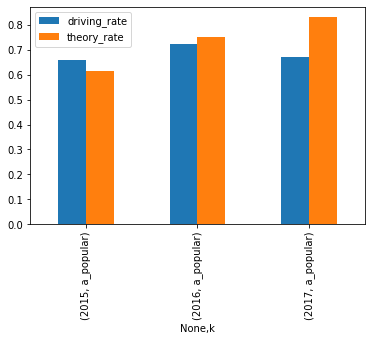

In [105]:
tableB2015, summary = prepare_table_b(2015)
tableB2016, summary = prepare_table_b(2016)
tableB2017, summary = prepare_table_b(2017)
contableB = pd.concat([tableB2015, tableB2016, tableB2017], keys=["2015", "2016", "2017"])
contableB.loc[[("2015", "a_popular"), ("2016", "a_popular"), ("2017", "a_popular")], ["driving_rate", "theory_rate"]].plot.bar()